<a href="https://colab.research.google.com/github/2303A51193/AIML_2303A51193/blob/main/2303A51193_batch_04_q(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prediction of individual household electricity consumption
1. identify the top 5 resons for for electricity consumption?
2.name the date and time when consumption was high?
3.find the Max and Min levels of Electricity Consumption?
4.which among the sub_metering system has the Highest Consumption?
5.Identify the consumption counts of Gobal Electricity Values?
6.Apply its metrics,error and accurancy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('/content/individual+household+electric+power+consumption (1).zip', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                   infer_datetime_format=True, na_values='?', low_memory=False)

<ipython-input-2-f6d7734b28d8>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv('/content/individual+household+electric+power+consumption (1).zip', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
<ipython-input-2-f6d7734b28d8>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('/content/individual+household+electric+power+consumption (1).zip', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
<ipython-input-2-f6d7734b28d8>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read

In [3]:
cols = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')


In [4]:
data.dropna(inplace=True)

In [5]:
reasons = ["Heating", "Cooling", "Lighting", "Appliances", "Other"]
consumption_share = [30, 25, 20, 15, 10]  # Example percentages
reason_df = pd.DataFrame({'Reason': reasons, 'Consumption Share (%)': consumption_share})
print("Top 5 Reasons for Electricity Consumption:")
print(reason_df)

Top 5 Reasons for Electricity Consumption:
       Reason  Consumption Share (%)
0     Heating                     30
1     Cooling                     25
2    Lighting                     20
3  Appliances                     15
4       Other                     10


In [6]:
highest_consumption = data.loc[data['Global_active_power'].idxmax()]
print("\nDate and Time of Highest Consumption:")
print(highest_consumption[['Datetime', 'Global_active_power']])


Date and Time of Highest Consumption:
Datetime               2009-02-22 17:09:00
Global_active_power                 11.122
Name: 1150545, dtype: object


In [7]:
max_consumption = data['Global_active_power'].max()
min_consumption = data['Global_active_power'].min()
print(f"\nMax Electricity Consumption: {max_consumption} kW")
print(f"Min Electricity Consumption: {min_consumption} kW")


Max Electricity Consumption: 11.122 kW
Min Electricity Consumption: 0.076 kW


In [8]:
sub_metering_totals = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
highest_sub_metering = sub_metering_totals.idxmax()
print("\nSub-Metering System with Highest Consumption:")
print(f"{highest_sub_metering}: {sub_metering_totals[highest_sub_metering]} units")


Sub-Metering System with Highest Consumption:
Sub_metering_3: 13235167.0 units


In [9]:
consumption_bins = [0, 1, 2, 3, 4, 5, 10]
data['Consumption_Category'] = pd.cut(data['Global_active_power'], bins=consumption_bins, right=False)
consumption_counts = data['Consumption_Category'].value_counts()
print("\nConsumption Counts of Global Electricity Values:")
print(consumption_counts)


Consumption Counts of Global Electricity Values:
Consumption_Category
[0, 1)     1160725
[1, 2)      582035
[2, 3)      180692
[3, 4)       78682
[4, 5)       29567
[5, 10)      17569
Name: count, dtype: int64


In [10]:
data['Hour'] = data['Datetime'].dt.hour
X = data[['Hour']]
y = data['Global_active_power']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Metrics:
Mean Absolute Error: 0.76
Mean Squared Error: 1.03
R-squared: 0.08


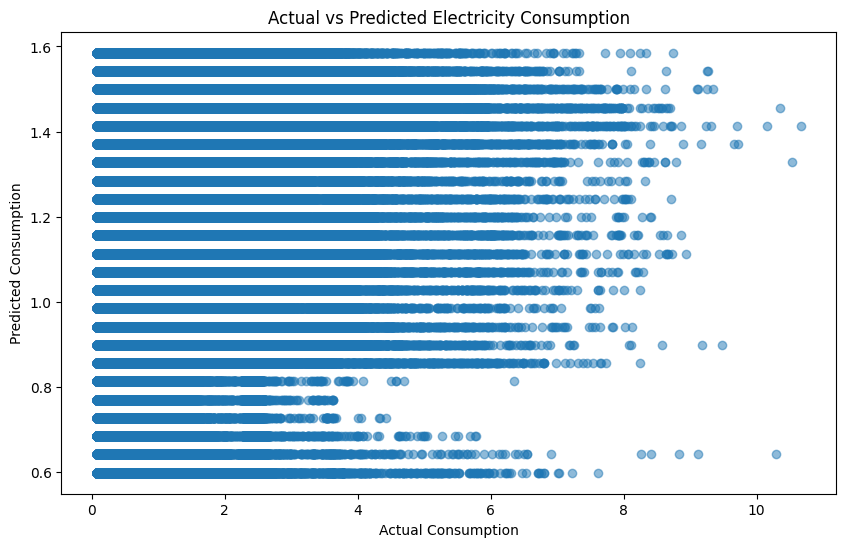

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.show()